# Proyecto 1

Integrantes:
- Francis Aguilar - 22243
- César López - 22535
- Angela García -22869


In [4]:
import pandas as pd
import numpy as np
import sys
import os
import lxml

In [6]:
carpeta = 'xlss' 
carpeta_salida = 'data' 
os.makedirs(carpeta_salida, exist_ok=True)

#nombres de las columnas esperadas
columnas = [
    'CODIGO', 'DISTRITO', 'DEPARTAMENTO', 'MUNICIPIO', 'ESTABLECIMIENTO',
    'DIRECCION', 'TELEFONO', 'SUPERVISOR', 'DIRECTOR', 'NIVEL', 'SECTOR',
    'AREA', 'STATUS', 'MODALIDAD', 'JORNADA', 'PLAN', 'DEPARTAMENTAL'
]


for archivo in os.listdir(carpeta):
    if archivo.endswith(".xls"):
        ruta_archivo = os.path.join(carpeta, archivo)
        nombre_csv = os.path.splitext(archivo)[0] + ".csv"
        ruta_csv = os.path.join(carpeta_salida, nombre_csv)

        if os.path.exists(ruta_csv):
            print(f"Ya existe: {nombre_csv}, se omite.")
            continue
        try:
            tablas = pd.read_html(ruta_archivo)
            tabla_principal = max(tablas, key=lambda df: df.shape[1])

            # reemplazar los nombres de columnas, porque sino sale con numeros del 1 al 17
            if tabla_principal.shape[1] == len(columnas):
                tabla_principal.columns = columnas
                tabla_principal = tabla_principal.iloc[1:] # Eliminar la primera fila que suele ser un encabezado adicional
            else:
                print(f"Columnas no coinciden en {archivo}, se omite renombrado.")

            tabla_principal.to_csv(ruta_csv, index=False)
            print(f"Convertido: {archivo} → {nombre_csv}")

        except Exception as e:
            print(f"Error al procesar {archivo}: {e}")

print("Se finalizo la conversion")


Ya existe: ALTA VERAPAZ.csv, se omite.
Ya existe: BAJA VERAPAZ.csv, se omite.
Ya existe: CHIMALTENANGO.csv, se omite.
Ya existe: CHIQUIMULA.csv, se omite.
Ya existe: CIUDAD CAPITAL.csv, se omite.
Ya existe: EL PROGRESO.csv, se omite.
Ya existe: ESCUINTLA.csv, se omite.
Ya existe: GUATEMALA.csv, se omite.
Ya existe: HUEHUETENANGO.csv, se omite.
Ya existe: IZABAL.csv, se omite.
Ya existe: JALAPA.csv, se omite.
Ya existe: JUTIAPA.csv, se omite.
Ya existe: PETEN.csv, se omite.
Ya existe: QUETZALTENANGO.csv, se omite.
Ya existe: QUICHE.csv, se omite.
Ya existe: RETALHULEU.csv, se omite.
Ya existe: SACATEPEQUEZ.csv, se omite.
Ya existe: SAN MARCOS.csv, se omite.
Ya existe: SANTA ROSA.csv, se omite.
Ya existe: SOLOLA.csv, se omite.
Ya existe: SUCHITEPEQUEZ.csv, se omite.
Ya existe: TOTONICAPAN.csv, se omite.
Ya existe: ZACAPA.csv, se omite.
Se finalizo la conversion


In [7]:
# juntar los datos 
carpeta = 'data'
csv_final = 'data.csv'

dataframes=[]

for archivo in os.listdir(carpeta):
    if archivo.endswith('.csv'):
        ruta = os.path.join(carpeta, archivo)
        try:
            df = pd.read_csv(ruta)
            dataframes.append(df)
            print(f"Agregado: {archivo}")
        except Exception as e:
            print(f"Error en {archivo}: {e}")

#concatenar los dfs
df_consolidado = pd.concat(dataframes, ignore_index=True)

#guardar
df_consolidado.to_csv(csv_final, index=False)
print(f"CSV guardado : {csv_final}")

Agregado: ALTA VERAPAZ.csv
Agregado: BAJA VERAPAZ.csv
Agregado: CHIMALTENANGO.csv
Agregado: CHIQUIMULA.csv
Agregado: CIUDAD CAPITAL.csv
Agregado: EL PROGRESO.csv
Agregado: ESCUINTLA.csv
Agregado: GUATEMALA.csv
Agregado: HUEHUETENANGO.csv
Agregado: IZABAL.csv
Agregado: JALAPA.csv
Agregado: JUTIAPA.csv
Agregado: PETEN.csv
Agregado: QUETZALTENANGO.csv
Agregado: QUICHE.csv
Agregado: RETALHULEU.csv
Agregado: SACATEPEQUEZ.csv
Agregado: SAN MARCOS.csv
Agregado: SANTA ROSA.csv
Agregado: SOLOLA.csv
Agregado: SUCHITEPEQUEZ.csv
Agregado: TOTONICAPAN.csv
Agregado: ZACAPA.csv
CSV guardado : data.csv


In [8]:

df = pd.read_csv(csv_final)

#describir el set de datos
df.describe(include='all')



,CODIGO,DISTRITO,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO,DIRECCION,TELEFONO,SUPERVISOR,DIRECTOR,NIVEL,SECTOR,AREA,STATUS,MODALIDAD,JORNADA,PLAN,DEPARTAMENTAL
count,6599,6599,6599,6599,6599,6597,6553,6599,6573,6599,6599,6599,6599,6599,6599,6599,6599
unique,6599,622,23,343,3786,4433,4215,599,3863,1,4,3,1,2,6,12,26
top,16-01-0138-46,01-403,GUATEMALA,ZONA 1,INSTITUTO NACIONAL DE EDUCACION DIVERSIFICADA,CABECERA MUNICIPAL,22093200.0,MIGUEL ANGEL ARMAS ROCHA,MARÍA DOLORES PÉREZ TUCHÁN,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,DOBLE,DIARIO(REGULAR),GUATEMALA OCCIDENTE
freq,1,160,1038,302,286,199,12,190,10,6599,5417,5249,6599,6390,1957,4051,551


In [9]:
#filas de datos
print("Cantidad de filas en el set de datos:")
print(df.shape[0])

print("-"*150)
#cuantas variables tiene el set de datos
print("Cantidad de variables en el set de datos:")
print(df.shape[1])

Cantidad de filas en el set de datos:
6622
------------------------------------------------------------------------------------------------------------------------------------------------------
Cantidad de variables en el set de datos:
17


### Exploración de datos

In [10]:
print(df.head())

          CODIGO DISTRITO  DEPARTAMENTO MUNICIPIO  \
0  16-01-0138-46   16-031  ALTA VERAPAZ     COBAN   
1  16-01-0139-46   16-031  ALTA VERAPAZ     COBAN   
2  16-01-0140-46   16-031  ALTA VERAPAZ     COBAN   
3  16-01-0141-46   16-005  ALTA VERAPAZ     COBAN   
4  16-01-0142-46   16-005  ALTA VERAPAZ     COBAN   

                                     ESTABLECIMIENTO  \
0                                      COLEGIO COBAN   
1                   COLEGIO PARTICULAR MIXTO VERAPAZ   
2                            COLEGIO "LA INMACULADA"   
3           ESCUELA NACIONAL DE CIENCIAS COMERCIALES   
4  INSTITUTO NORMAL MIXTO DEL NORTE 'EMILIO ROSAL...   

                                DIRECCION  TELEFONO  \
0  KM.2 SALIDA A SAN JUAN CHAMELCO ZONA 8  77945104   
1            KM 209.5 ENTRADA A LA CIUDAD  77367402   
2               7A. AVENIDA 11-109 ZONA 6  78232301   
3                   2A CALLE 11-10 ZONA 2  79514215   
4                     3A AVE 6-23 ZONA 11  79521468   

             

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6622 entries, 0 to 6621
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CODIGO           6599 non-null   object
 1   DISTRITO         6599 non-null   object
 2   DEPARTAMENTO     6599 non-null   object
 3   MUNICIPIO        6599 non-null   object
 4   ESTABLECIMIENTO  6599 non-null   object
 5   DIRECCION        6597 non-null   object
 6   TELEFONO         6553 non-null   object
 7   SUPERVISOR       6599 non-null   object
 8   DIRECTOR         6573 non-null   object
 9   NIVEL            6599 non-null   object
 10  SECTOR           6599 non-null   object
 11  AREA             6599 non-null   object
 12  STATUS           6599 non-null   object
 13  MODALIDAD        6599 non-null   object
 14  JORNADA          6599 non-null   object
 15  PLAN             6599 non-null   object
 16  DEPARTAMENTAL    6599 non-null   object
dtypes: object(17)
memory usage: 879.6

In [12]:
print(df.describe(include='all'))

               CODIGO DISTRITO DEPARTAMENTO MUNICIPIO  \
count            6599     6599         6599      6599   
unique           6599      622           23       343   
top     16-01-0138-46   01-403    GUATEMALA    ZONA 1   
freq                1      160         1038       302   

                                      ESTABLECIMIENTO           DIRECCION  \
count                                            6599                6597   
unique                                           3786                4433   
top     INSTITUTO NACIONAL DE EDUCACION DIVERSIFICADA  CABECERA MUNICIPAL   
freq                                              286                 199   

          TELEFONO                SUPERVISOR                    DIRECTOR  \
count         6553                      6599                        6573   
unique        4215                       599                        3863   
top     22093200.0  MIGUEL ANGEL ARMAS ROCHA  MARÍA DOLORES PÉREZ TUCHÁN   
freq            12      

In [13]:
print(df.dtypes)

CODIGO             object
DISTRITO           object
DEPARTAMENTO       object
MUNICIPIO          object
ESTABLECIMIENTO    object
DIRECCION          object
TELEFONO           object
SUPERVISOR         object
DIRECTOR           object
NIVEL              object
SECTOR             object
AREA               object
STATUS             object
MODALIDAD          object
JORNADA            object
PLAN               object
DEPARTAMENTAL      object
dtype: object


In [14]:
print(df.isnull().sum())

CODIGO             23
DISTRITO           23
DEPARTAMENTO       23
MUNICIPIO          23
ESTABLECIMIENTO    23
DIRECCION          25
TELEFONO           69
SUPERVISOR         23
DIRECTOR           49
NIVEL              23
SECTOR             23
AREA               23
STATUS             23
MODALIDAD          23
JORNADA            23
PLAN               23
DEPARTAMENTAL      23
dtype: int64


In [15]:
print(f"Duplicados: {df.duplicated().sum()}")


Duplicados: 22


In [16]:
print(df.nunique())

CODIGO             6599
DISTRITO            622
DEPARTAMENTO         23
MUNICIPIO           343
ESTABLECIMIENTO    3786
DIRECCION          4433
TELEFONO           4215
SUPERVISOR          599
DIRECTOR           3863
NIVEL                 1
SECTOR                4
AREA                  3
STATUS                1
MODALIDAD             2
JORNADA               6
PLAN                 12
DEPARTAMENTAL        26
dtype: int64


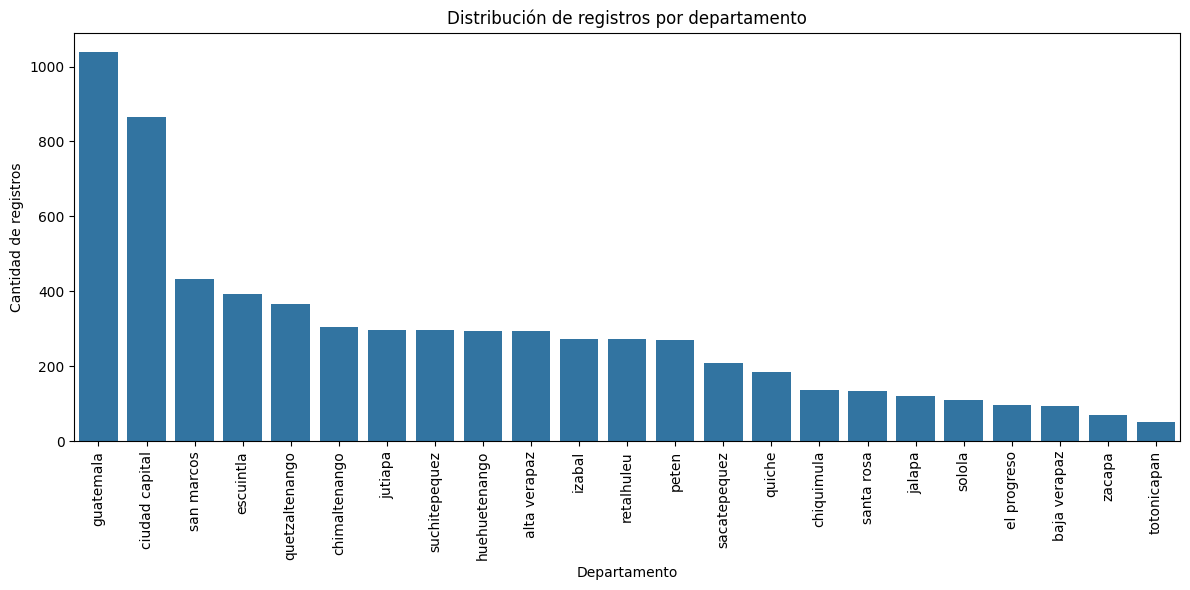

In [22]:
# CANtidad de registros por departamento
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='DEPARTAMENTO', order=df['DEPARTAMENTO'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribución de registros por departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de registros')
plt.tight_layout()
plt.show()

# Limpieza de datos

In [17]:
#borrar loda datos duplicados
df.drop_duplicates(inplace=True)

In [18]:
print(f"Duplicados: {df.duplicated().sum()}")

Duplicados: 0


In [19]:
#convertir todos los datos que son string a lowecase
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower()

In [20]:
print(df.head())

          CODIGO DISTRITO  DEPARTAMENTO MUNICIPIO  \
0  16-01-0138-46   16-031  alta verapaz     coban   
1  16-01-0139-46   16-031  alta verapaz     coban   
2  16-01-0140-46   16-031  alta verapaz     coban   
3  16-01-0141-46   16-005  alta verapaz     coban   
4  16-01-0142-46   16-005  alta verapaz     coban   

                                     ESTABLECIMIENTO  \
0                                      colegio coban   
1                   colegio particular mixto verapaz   
2                            colegio "la inmaculada"   
3           escuela nacional de ciencias comerciales   
4  instituto normal mixto del norte 'emilio rosal...   

                                DIRECCION  TELEFONO  \
0  km.2 salida a san juan chamelco zona 8  77945104   
1            km 209.5 entrada a la ciudad  77367402   
2               7a. avenida 11-109 zona 6  78232301   
3                   2a calle 11-10 zona 2  79514215   
4                     3a ave 6-23 zona 11  79521468   

             

In [23]:
#quitar valores faltantes
print(f"Filas valores faltantes: {df.shape[0]}")
df.dropna(inplace=True)

print(f"Filas después de quitar valores faltantes: {df.shape[0]}")

Filas antes de quitar valores faltantes: 6600
Filas después de quitar valores faltantes: 6538


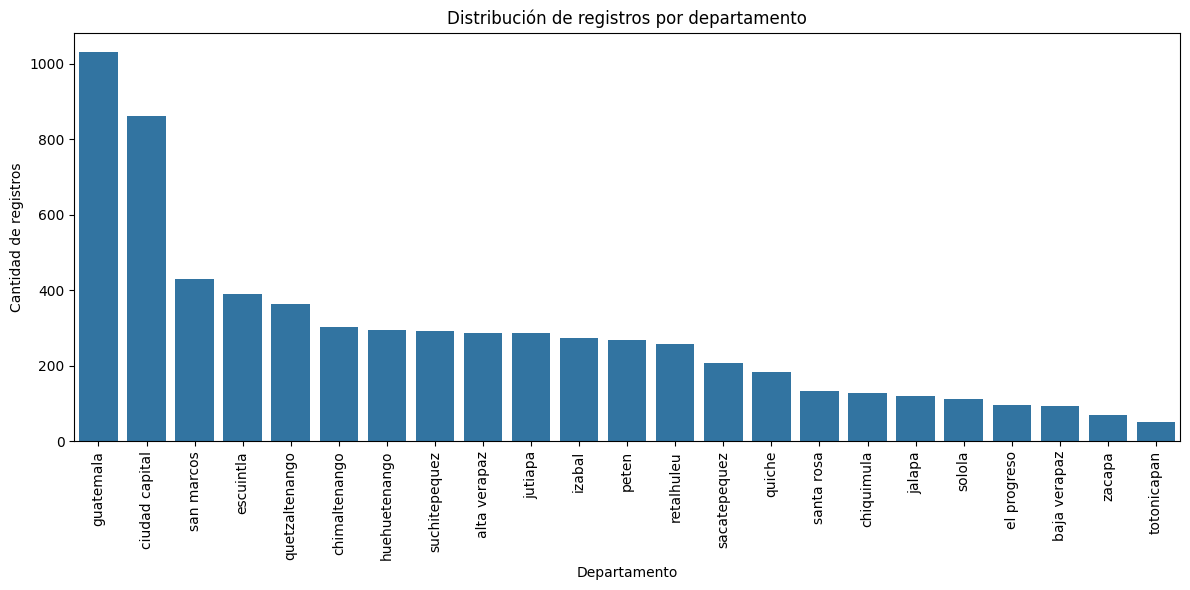

In [24]:
# ver de nuevo la distribucion
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='DEPARTAMENTO', order=df['DEPARTAMENTO'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribución de registros por departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de registros')
plt.tight_layout()
plt.show()

In [ ]:
# quitar las tildes de de los datos cualitativos y los que no cumplan con el coso ascii y normalizacion ocon unicode para separar letras de sus acentos o caracteres especiales.
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [27]:
print(df.head())

          CODIGO DISTRITO  DEPARTAMENTO MUNICIPIO  \
0  16-01-0138-46   16-031  alta verapaz     coban   
1  16-01-0139-46   16-031  alta verapaz     coban   
2  16-01-0140-46   16-031  alta verapaz     coban   
3  16-01-0141-46   16-005  alta verapaz     coban   
4  16-01-0142-46   16-005  alta verapaz     coban   

                                     ESTABLECIMIENTO  \
0                                      colegio coban   
1                   colegio particular mixto verapaz   
2                            colegio "la inmaculada"   
3           escuela nacional de ciencias comerciales   
4  instituto normal mixto del norte 'emilio rosal...   

                                DIRECCION  TELEFONO  \
0  km.2 salida a san juan chamelco zona 8  77945104   
1            km 209.5 entrada a la ciudad  77367402   
2               7a. avenida 11-109 zona 6  78232301   
3                   2a calle 11-10 zona 2  79514215   
4                     3a ave 6-23 zona 11  79521468   

             

In [28]:
# quitar las dobles comillas o transcripciones
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.replace('"', '').str.replace("'", "")